In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [98]:
import seaborn as sns

In [99]:
df_retina = pd.read_csv("S1 Data.CSV",header=None)

In [100]:
df_allen_types_and_pos = pd.read_csv("../soma_valence_v185.csv")

In [101]:
df_e = df_allen_types_and_pos[df_allen_types_and_pos.cell_type=="e"]

In [102]:
df_e.shape

(362, 7)

In [103]:
pt_to_row = dict(zip(df_e['pt_root_id'],np.arange(362)))
pt_to_row

{648518346349540057: 0,
 648518346349538466: 1,
 648518346349538711: 2,
 648518346349538715: 3,
 648518346349537038: 4,
 648518346349539103: 5,
 648518346349539080: 6,
 648518346349539068: 7,
 648518346349536988: 8,
 648518346349536753: 9,
 648518346349539095: 10,
 648518346349539067: 11,
 648518346349539539: 12,
 648518346349539435: 13,
 648518346349537081: 14,
 648518346349537145: 15,
 648518346349531254: 16,
 648518346349539554: 17,
 648518346349539336: 18,
 648518346349533267: 19,
 648518346349540051: 20,
 648518346349537297: 21,
 648518346349539517: 22,
 648518346349539333: 23,
 648518346349539368: 24,
 648518346349539524: 25,
 648518346349519354: 26,
 648518346349539804: 27,
 648518346349539591: 28,
 648518346349537071: 29,
 648518346349539569: 30,
 648518346349539575: 31,
 648518346349539366: 32,
 648518346349537047: 33,
 648518346349536924: 34,
 648518346349539961: 35,
 648518346349539510: 36,
 648518346349537547: 37,
 648518346349537860: 38,
 648518346349531994: 39,
 648518346

In [104]:
df_allen_con = pd.read_csv("../soma_subgraph_synapses_spines_v185.csv")

In [105]:
df_allen_con['pre_row'] = df_allen_con['pre_root_id'].apply(lambda x:pt_to_row[x])

In [106]:
df_allen_con['post_row'] = df_allen_con['post_root_id'].apply(lambda x:pt_to_row[x])

In [107]:
conn = np.zeros((362,362))

In [108]:
df_allen_con.head()

id         pre_root_id        post_root_id  cleft_vx  spine_vol_um3  \
0     1484  648518346349539437  648518346349531254       798       0.133004   
1  3056393  648518346349537978  648518346349531254       209       0.087794   
2   310116  648518346349538410  648518346349531254       869       0.234537   
3  1533059  648518346349538410  648518346349531254       231       0.081921   
4  2505779  648518346349538410  648518346349531254       669       0.105706   

   ctr_pt_x_nm  ctr_pt_y_nm  ctr_pt_z_nm  pre_pos_x_vx  pre_pos_y_vx  \
0       365476       231192        63280         91332         57836   
1       312120       209816         9960         78050         52470   
2       313596       185764        23920         78314         46428   
3       289560       174904        33920         72340         43756   
4       296056       162304         9520         73966         40608   

   pre_pos_z_vx  ctr_pos_x_vx  ctr_pos_y_vx  ctr_pos_z_vx  post_pos_x_vx  \
0          1584         91369         57798          1582          91332   
1           248         78030         52454           249          77980   
2           598         78399         46441           598          78404   
3           849         72390         43726           848          72354   
4           231         74014         40576           238          73918   

   post_pos_y_vx  post_pos_z_vx  pre_row  post_row  
0          57748           1584      129        16  
1          52444            249      150        16  
2          46410            598      164        16  
3          43704            849      164        16  
4          40562            232      164        16

In [109]:
conn[[df_allen_con['pre_row'],df_allen_con['post_row']]] = 1

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



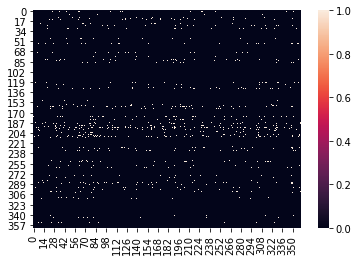

In [110]:
sns.heatmap(conn)

In [111]:
weighted_conn = np.zeros_like(conn)

In [112]:
weighted_conn[[df_allen_con['pre_row'],df_allen_con['post_row']]] = df_allen_con['spine_vol_um3']

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [113]:
conn.sum()

1736.0

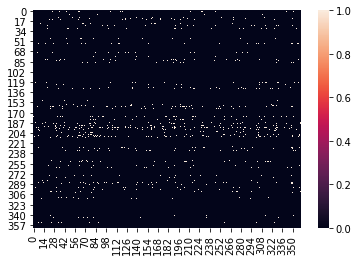

In [114]:
sns.heatmap(conn)

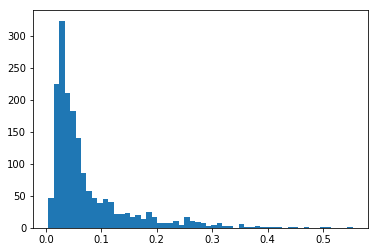

In [115]:
plt.hist(weighted_conn[weighted_conn!=0],bins="auto");

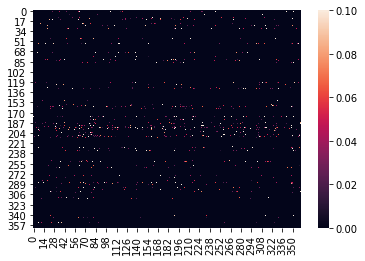

In [116]:
sns.heatmap(weighted_conn,vmax=0.1)

In [117]:
x = np.array(df_e['pt_position'].apply(lambda x:list(map(int,x[1:-1].split()))[0]).values)
y = np.array(df_e['pt_position'].apply(lambda x:list(map(int,x[1:-1].split()))[1]).values)
z = np.array(df_e['pt_position'].apply(lambda x:list(map(int,x[1:-1].split()))[2]).values)

In [118]:
df_e['x'] = x/1000
df_e['y'] = y/1000
df_e['z'] = z/1000
df_e.head()

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

id cell_type             pt_position          pt_root_id  soma_x_nm  \
0   17         e  [103860  44385    891]  648518346349540057     415440   
1  453         e     [84054 50604  1424]  648518346349538466     336216   
2   35         e  [103728  54333    304]  648518346349538711     414912   
3   74         e     [51543 57568   155]  648518346349538715     206172   
4  231         e     [77197 61773   428]  648518346349537038     308788   

   soma_y_nm  soma_z_nm        x       y      z  
0     415440    4154400  103.860  44.385  0.891  
1     336216    3362160   84.054  50.604  1.424  
2     414912    4149120  103.728  54.333  0.304  
3     206172    2061720   51.543  57.568  0.155  
4     308788    3087880   77.197  61.773  0.428

In [119]:
idx = (conn.sum(0)>0)

In [120]:
df_allen_types_and_pos.head()

id cell_type             pt_position          pt_root_id  soma_x_nm  \
0   17         e  [103860  44385    891]  648518346349540057     415440   
1  453         e     [84054 50604  1424]  648518346349538466     336216   
2   35         e  [103728  54333    304]  648518346349538711     414912   
3   74         e     [51543 57568   155]  648518346349538715     206172   
4  231         e     [77197 61773   428]  648518346349537038     308788   

   soma_y_nm  soma_z_nm  
0     415440    4154400  
1     336216    3362160  
2     414912    4149120  
3     206172    2061720  
4     308788    3087880

In [121]:
V = df_e['soma_x_nm']*df_e['soma_y_nm']*df_e['soma_z_nm']
V = V/V.mean()
V[idx].to_csv("allen_V.csv")

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [122]:
emb = np.vstack([x,y,z]).T

In [123]:
dm = pairwise_distances(emb)

In [124]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [126]:
Z = linkage(dm)
T = dendrogram(Z, no_plot=True)

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [128]:
dm.shape

(362, 362)

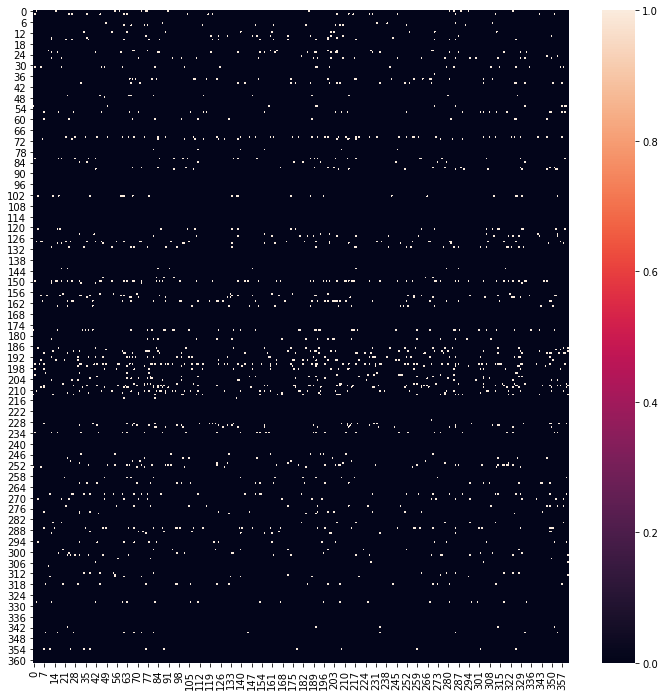

In [130]:
plt.figure(figsize=(12,12))
sns.heatmap(conn)

In [134]:
idx2 = T['leaves']

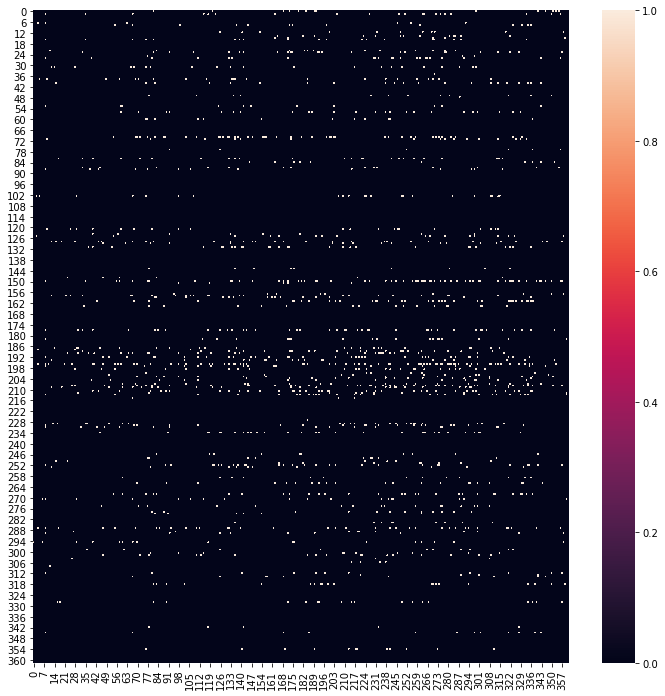

In [140]:
plt.figure(figsize=(12,12))
sns.heatmap(conn[:,idx2])

In [29]:
df_e[idx].to_csv("df_e.csv")

In [30]:
df_e[idx].head()

id cell_type             pt_position          pt_root_id  soma_x_nm  \
0   17         e  [103860  44385    891]  648518346349540057     415440   
1  453         e     [84054 50604  1424]  648518346349538466     336216   
2   35         e  [103728  54333    304]  648518346349538711     414912   
3   74         e     [51543 57568   155]  648518346349538715     206172   
4  231         e     [77197 61773   428]  648518346349537038     308788   

   soma_y_nm  soma_z_nm        x       y      z  
0     415440    4154400  103.860  44.385  0.891  
1     336216    3362160   84.054  50.604  1.424  
2     414912    4149120  103.728  54.333  0.304  
3     206172    2061720   51.543  57.568  0.155  
4     308788    3087880   77.197  61.773  0.428

In [31]:
df_allen_con.head()

id         pre_root_id        post_root_id  cleft_vx  spine_vol_um3  \
0     1484  648518346349539437  648518346349531254       798       0.133004   
1  3056393  648518346349537978  648518346349531254       209       0.087794   
2   310116  648518346349538410  648518346349531254       869       0.234537   
3  1533059  648518346349538410  648518346349531254       231       0.081921   
4  2505779  648518346349538410  648518346349531254       669       0.105706   

   ctr_pt_x_nm  ctr_pt_y_nm  ctr_pt_z_nm  pre_pos_x_vx  pre_pos_y_vx  \
0       365476       231192        63280         91332         57836   
1       312120       209816         9960         78050         52470   
2       313596       185764        23920         78314         46428   
3       289560       174904        33920         72340         43756   
4       296056       162304         9520         73966         40608   

   pre_pos_z_vx  ctr_pos_x_vx  ctr_pos_y_vx  ctr_pos_z_vx  post_pos_x_vx  \
0          1584         91369         57798          1582          91332   
1           248         78030         52454           249          77980   
2           598         78399         46441           598          78404   
3           849         72390         43726           848          72354   
4           231         74014         40576           238          73918   

   post_pos_y_vx  post_pos_z_vx  pre_row  post_row  
0          57748           1584      129        16  
1          52444            249      150        16  
2          46410            598      164        16  
3          43704            849      164        16  
4          40562            232      164        16

In [33]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [88]:
trace1=go.Scatter3d(x=x,
               y=y,
               z=z,
               mode='markers',
               marker=dict(symbol='circle',
                             size=6,
                             color=conn.sum(1),
                             colorscale='Reds',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               hoverinfo='none'
               )

In [89]:
Xe = []
Ye = []
Ze = []
for pre, post in zip(*np.nonzero(conn)):
    Xe+=[x[pre],x[post], None]
    Ye+=[y[pre],y[post], None]
    Ze+=[z[pre],z[post], None]

In [90]:
trace2=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

In [95]:
axis=dict(showbackground=True,
          showline=True,
          zeroline=False,
          showgrid=True,
          showticklabels=True,
          )

layout = go.Layout(
         title="L2/3 Connectivity. Color ~ Outdegree, original X/Y/Z coordinates",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

In [96]:
data=[trace1, trace2]
fig=go.FigureWidget(data=data, layout=layout)
fig.write_html("allen network vis.html")
# fig.show()
# fig.wr

In [32]:
from matplotlib.patches import FancyArrowPatch

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [34]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
        
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)

<IPython.core.display.Javascript object>


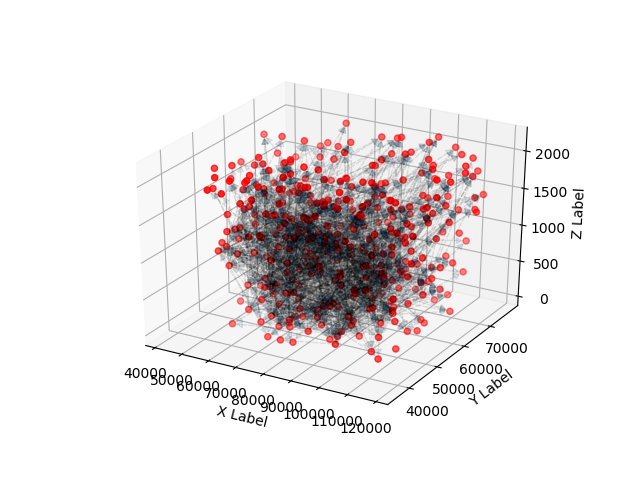

Text(0.5,0,'Z Label')

In [35]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

for i in range(362):
    for j in range(362):
        if conn[i,j]!=0:
            ax.arrow3D(x[i],y[i],z[i],
                       x[j]-x[i],y[j]-y[i],z[j]-z[i],
                       mutation_scale=10,
                       arrowstyle="-|>",
                       linestyle='dashed',
                      alpha=0.1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

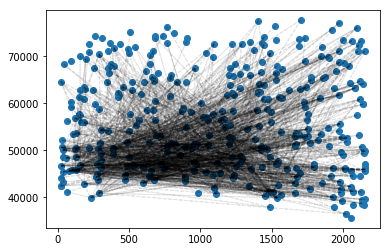

In [330]:
%matplotlib inline
plt.scatter(z, y)
for i in range(362):
    for j in range(362):
        if conn[i,j]!=0:
            plt.arrow(z[i],y[i],
                       z[j]-z[i],y[j]-y[i],
                       linestyle='dashed',
                      alpha=0.1)

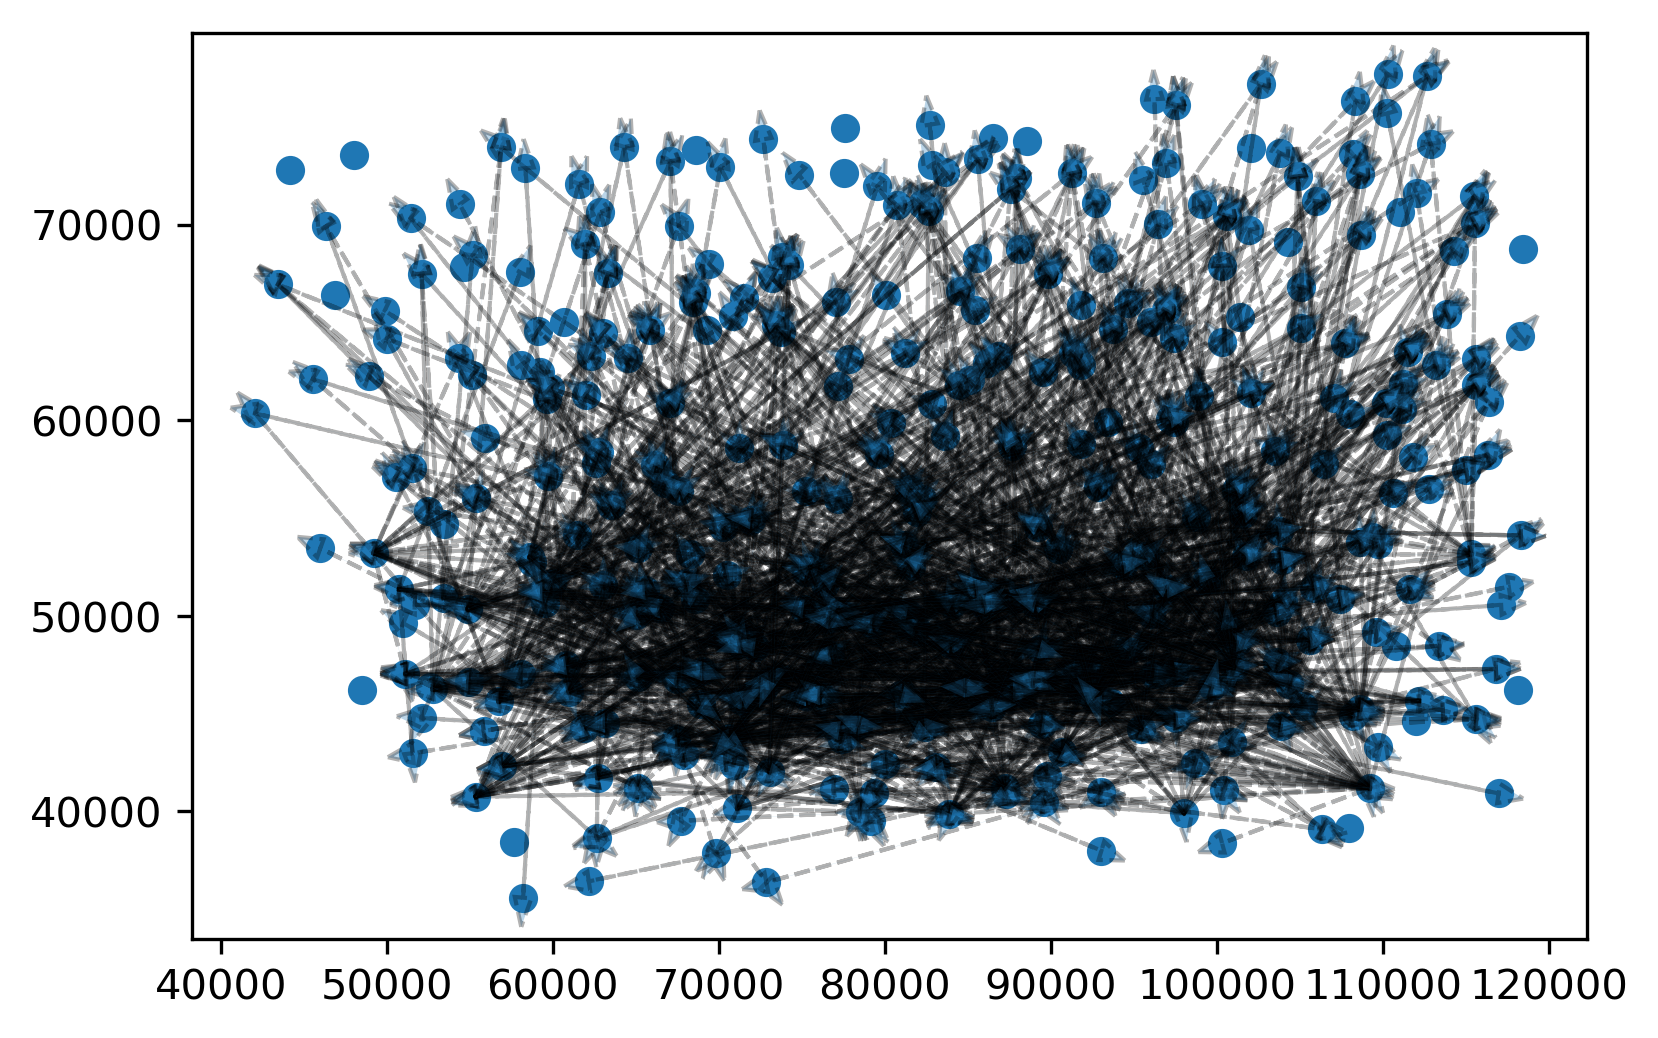

In [355]:
%matplotlib inline
plt.figure(dpi=300)
plt.scatter(x, y)
for i in range(362):
    for j in range(362):
        if conn[i,j]!=0:
            plt.arrow(x[i],y[i],
                       x[j]-x[i],y[j]-y[i],
                       linestyle='dashed',
                      alpha=0.3,
                     width=10,
                     head_width=1000)

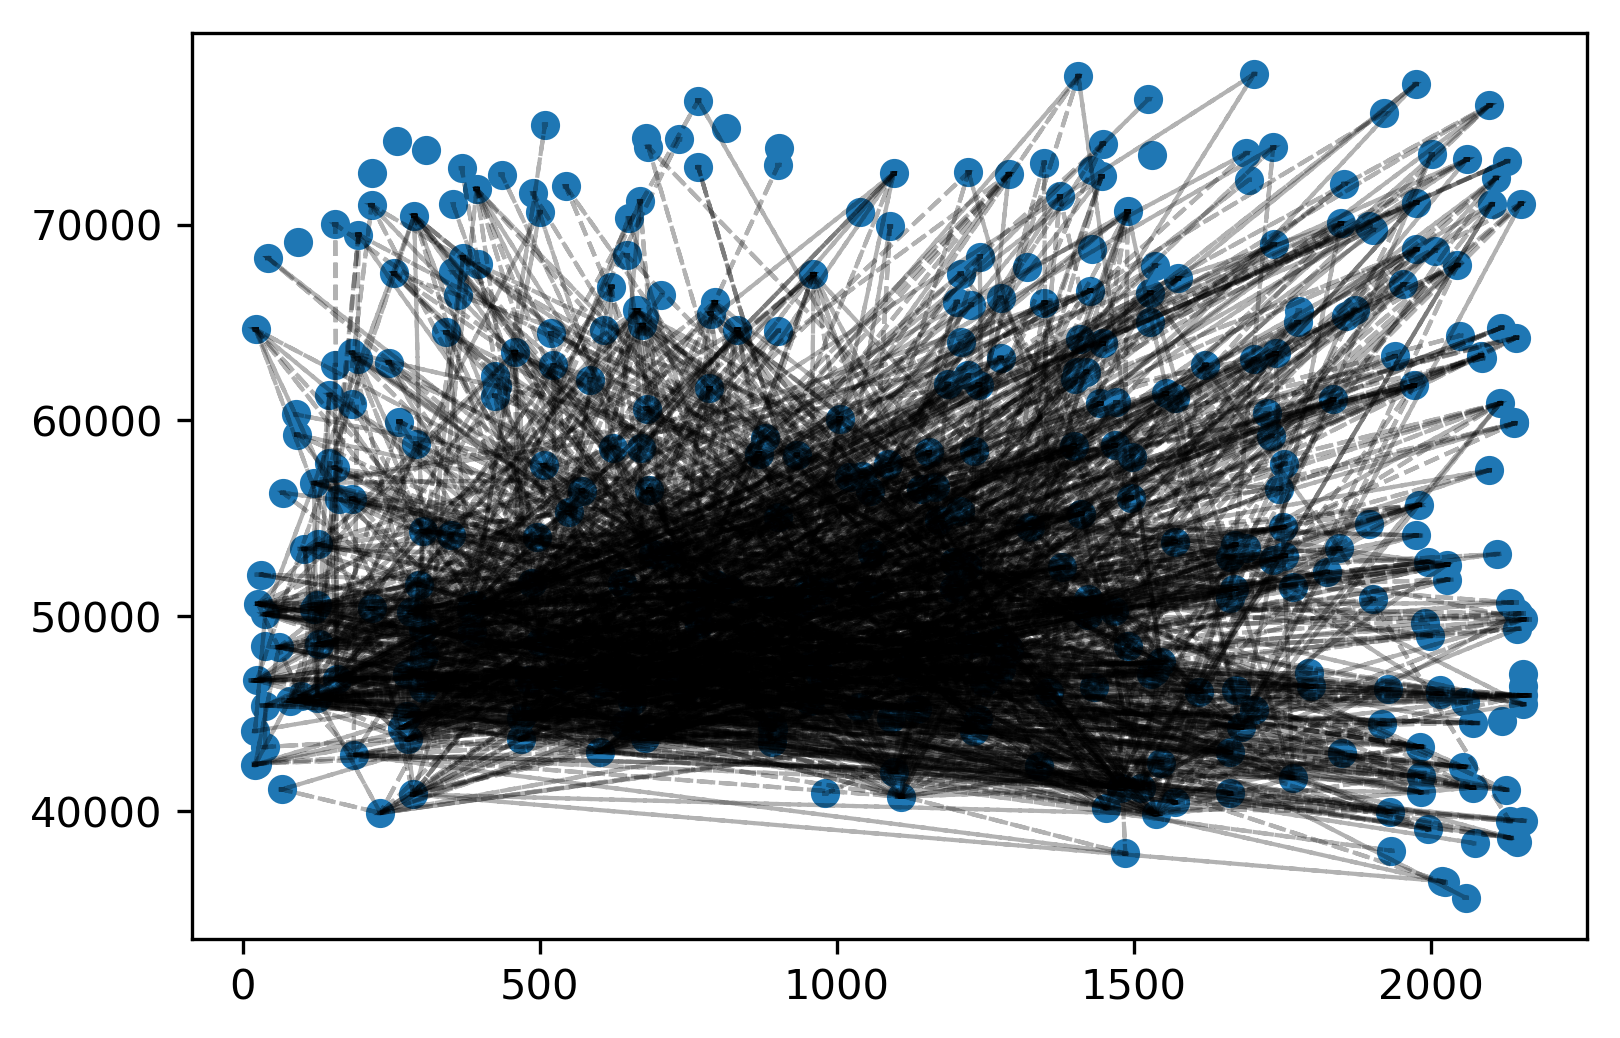

In [359]:
%matplotlib inline
plt.figure(dpi=300)
plt.scatter(z, y)
for i in range(362):
    for j in range(362):
        if conn[i,j]!=0:
            plt.arrow(z[i],y[i],
                       z[j]-z[i],y[j]-y[i],
                       linestyle='dashed',
                      alpha=0.3,
                     head_width=10)

In [242]:
df_e

id cell_type             pt_position          pt_root_id  soma_x_nm  \
0     17         e  [103860  44385    891]  648518346349540057     415440   
1    453         e     [84054 50604  1424]  648518346349538466     336216   
2     35         e  [103728  54333    304]  648518346349538711     414912   
3     74         e     [51543 57568   155]  648518346349538715     206172   
4    231         e     [77197 61773   428]  648518346349537038     308788   
5    335         e     [93008 40981  1984]  648518346349539103     372032   
6    239         e     [93551 45577  2058]  648518346349539080     374204   
7     11         e     [65539 51308   977]  648518346349539068     262156   
8     16         e  [100898  43550    891]  648518346349536988     403592   
9    256         e     [58354 72889   369]  648518346349536753     233416   
10   111         e     [77857 63138  1702]  648518346349539095     311428   
11   191         e     [63044 64447   519]  648518346349539067     252176   
12    45         e  [101740  53066    718]  648518346349539539     406960   
13    73         e     [61981 61296   146]  648518346349539435     247924   
14     3         e     [71110 40161  1454]  648518346349537081     284440   
15   123         e  [105199  45412     38]  648518346349537145     420796   
16     4         e     [77264 44133  1231]  648518346349531254     309056   
17   190         e     [63331 67511   255]  648518346349539554     253324   
18   195         e     [54333 63172  2087]  648518346349539336     217332   
19    75         e     [66431 50386   217]  648518346349533267     265724   
20    37         e  [111223  61856   1187]  648518346349540051     444892   
21     7         e  [111812  58145   1498]  648518346349537297     447248   
22   114         e     [68575 50858  1424]  648518346349539517     274300   
23    58         e     [83898 39867  1537]  648518346349539333     335592   
24   439         e     [81245 63448   184]  648518346349539368     324980   
25   148         e     [65140 53444  1846]  648518346349539524     260560   
26    43         e     [94619 48203  1290]  648518346349519354     378476   
27    92         e  [108640  53793   1569]  648518346349539804     434560   
28   172         e     [71531 66259  1276]  648518346349539591     286124   
29   285         e     [48536 46212  2016]  648518346349537071     194144   
..   ...       ...                     ...                 ...        ...   
426   63         e  [111652  51378    952]  648518346349539891     446608   
427  262         e  [110245  59258     92]  648518346349536391     440980   
428  259         e     [46905 66414   362]  648518346349536478     187620   
429  149         e     [67589 69944  1897]  648518346349536159     270356   
430  179         e     [58069 62826   155]  648518346349536366     232276   
431  233         e     [86548 74444   679]  648518346349536354     346192   
432  304         e  [118467  68777   1430]  648518346349535473     473868   
433  274         e     [54641 67831  1321]  648518346349535435     218564   
434   86         e     [96015 57785  1754]  648518346349535823     384060   
435  237         e  [103814  73662   1690]  648518346349537003     415256   
436   61         e     [90432 53419   104]  648518346349537153     361728   
437   21         e  [107071  61155   1570]  648518346349537270     428284   
438  214         e  [107425  50869   1903]  648518346349537331     429700   
439  281         e     [98028 39919   232]  648518346349536816     392112   
440  144         e     [69426 67970   396]  648518346349536788     277704   
441  153         e     [68651 66517  1528]  648518346349537989     274604   
442  247         e     [72687 74366   735]  648518346349538001     290748   
443  209         e     [76080 45938  2156]  648518346349538312     304320   
444  180         e     [67503 43305  1983]  648518346349538100     270012   
445  212         e     [99440 51845  2028]  648518346349537897     397760   
44

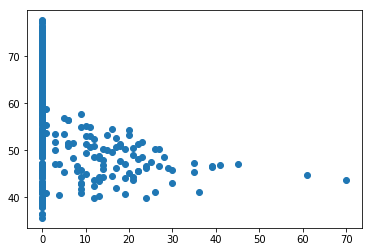

In [250]:
plt.scatter(conn.sum(1),df_e['y'])

In [243]:
np.savetxt("dm_allen.csv",dm[np.ix_(idx,idx)],delimiter=',')
np.savetxt("W_allen.csv",conn[np.ix_(idx,idx)],delimiter=',')
np.savetxt("weights_allen.csv",weighted_conn[np.ix_(idx,idx)],delimiter=',')

/Users/adamhaber/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/adamhaber/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


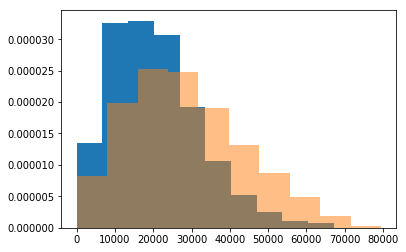

In [244]:
plt.hist(dm[conn==1],normed=True)
plt.hist(dm[conn==0],normed=True,alpha=0.5);

In [15]:
df_allen_con.id.unique().size

1961